# Predict Review Scores
Here, I try to predict the average review score of a listing using linear regressions and a radial SVR

## Import packages and load in data

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import seaborn as sns
import math
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

In [2]:
# import data
dir = str(Path().resolve())
df = pd.read_csv(dir + "/../data/listings.csv")

## Prepare data

In [3]:
# average all reviews to generate average_score feature and drop excess review features for fair prediction
df['average_score'] = (df.review_scores_accuracy + df.review_scores_checkin + df.review_scores_cleanliness + df.review_scores_communication + df.review_scores_location + df.review_scores_value) / 6
df = df.drop(['review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'review_scores_rating'], axis=1)

In [4]:
# split into X and Y
X = df.drop('average_score', axis=1)
y = df['average_score']

# convert objects to dummy variables
X = pd.get_dummies(X)

# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Train models

In [5]:
# NOTE: takes a long time
# train models
print("Training linear regression...")
lm = LinearRegression().fit(X_train, y_train)
print("Training linear reg with ridge regularization")
reg = Ridge(alpha=.5).fit(X_train, y_train)
print("Training radial kernel SVR...")
rad = SVR(gamma="auto", kernel="rbf").fit(X_train, y_train)
print("Done")

Training linear regression...
Training linear reg with ridge regularization
Training radial kernel SVR...


/Users/cccdenhart/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.765920e-19
  overwrite_a=True).T


Done


In [6]:
# get predictions
print("Generating predictions...")
lm_pred = lm.predict(X_test)
reg_pred = reg.predict(X_test)
rad_pred = rad.predict(X_test)
print("Done")

Generating predictions...
Done


## View results

In [7]:
# display evaluations
print("Linear Model Results:")
print("Explained Variance: " + str(explained_variance_score(y_test, lm_pred)))
print("MSE: " + str(mean_squared_error(y_test, lm_pred)))
print("R2: " + str(r2_score(y_test, lm_pred)))
print()
# display evaluations
print("Ridge Regularization Results:")
print("Explained Variance: " + str(explained_variance_score(y_test, reg_pred)))
print("MSE: " + str(mean_squared_error(y_test, reg_pred)))
print("R2: " + str(r2_score(y_test, reg_pred)))
print()
print("Linear Model with Regularization:")
print("Radial Kernel SVR Results:")
print("Explained Variance: " + str(explained_variance_score(y_test, rad_pred)))
print("MSE: " + str(mean_squared_error(y_test, rad_pred)))
print("R2: " + str(r2_score(y_test, rad_pred)))

Linear Model Results:
Explained Variance: 0.1434287737138703
MSE: 0.34507206786518557
R2: 0.1430113908638756

Ridge Regularization Results:
Explained Variance: 0.14379407926425725
MSE: 0.3449246444374958
R2: 0.14337751785593122

Linear Model with Regularization:
Radial Kernel SVR Results:
Explained Variance: 0.2965080758246498
MSE: 0.28368482487039837
R2: 0.29546698751146394


## Discussion

### Why are results so bad?
* Large left skew (histogram 1)
* Tried applying log transform to data --> still large skew (histogram 2)

/Users/cccdenhart/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


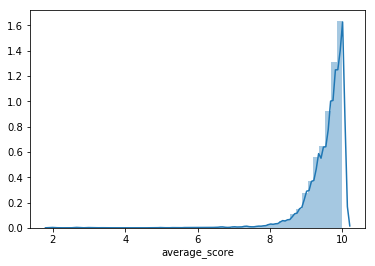

In [10]:
sns.distplot(df.average_score)

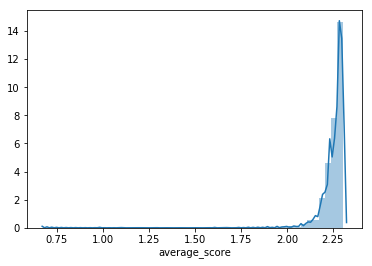

In [12]:
sns.distplot(df.average_score.apply(math.log))